3) In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4) Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv') 

4) Take a look at the first 10 rows.

In [3]:
gdp_df.head(10) 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


4) Look at the last 5 rows. Do you see a problem?

In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


4) Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868) 

5) Drop the 'Value Footnotes' column.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes']) 

5) Rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

6) How many rows and columns does gdp_df have? What are the data types of its columns? 

In [8]:
print(gdp_df.shape)

(6868, 3)


In [9]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

6) If any of the columns are not the expected types, figure out why and fix it. Should 'Country' be a string (STR)? 

7) Which years are represented in this dataset? 

In [10]:
gdp_df['Year'].min()

1990

In [11]:
gdp_df['Year'].max()

2019

7) Take a look at the number of observations per year. What do you notice?

In [12]:
gdp_df['Year'].value_counts().sort_values(ascending=True)

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1998    223
1997    223
1999    224
2000    231
2019    231
2001    232
2002    233
2003    233
2004    234
2005    234
2007    235
2006    235
2008    235
2010    236
2009    236
2011    237
2018    237
2012    237
2013    238
2015    238
2017    238
2016    238
2014    238
Name: Year, dtype: int64

The # of observations has moderately increased over time.

8) How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [13]:
gdp_df['Country'].value_counts()

Sub-Saharan Africa                            30
Nepal                                         30
Tanzania                                      30
Sub-Saharan Africa (excluding high income)    30
Congo                                         30
                                              ..
Nauru                                         16
Cayman Islands                                13
Sint Maarten (Dutch part)                     10
Turks and Caicos Islands                       9
Djibouti                                       7
Name: Country, Length: 238, dtype: int64

There are 238 countries in the data set. The least represented countries are Island nations and African nations. They likely have so few observations because they have limited economic infrastructure and government agencies to do this work.

9) Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [14]:
gdp_2014 = gdp_df[gdp_df.Year.isin(['2014'])]

10) Use .describe() to find the summary statistics for GDP per capita in 2014.

In [15]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710347
std,0.0,20983.869621
min,2014.0,822.610458
25%,2014.0,4753.110935
50%,2014.0,12209.385755
75%,2014.0,26803.610475
max,2014.0,156514.133800


11) Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(gdp_2014, bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000])
plt.show() 

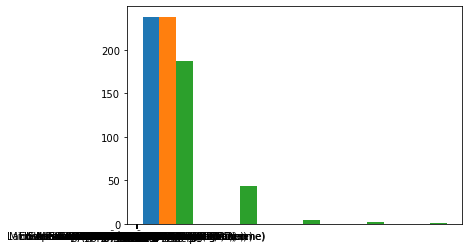

In [16]:
plt.hist(gdp_2014, bins=5)
plt.show() 

11) How would you describe the shape of the distribution? I would describe it as a right tail

12) Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [17]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.13380
3691,Luxembourg,2014,108760.91600
5138,Qatar,2014,95578.41697
5464,Singapore,2014,87808.66316
561,Bermuda,2014,77361.10488


In [18]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


13) Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [19]:
gdp_pivoted = (
    gdp_df
    [gdp_df['Year'].isin([1990,2017])]
    .pivot_table(
        values = 'GDP_Per_Capita',
        index = 'Country',
        columns = 'Year'
    )
    .dropna()
)

In [20]:
gdp_pivoted.head(5)

Year,1990,2017
Country,,
Albania,4842.734635,12811.759440
Algeria,8746.352901,11737.409350
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551680,19840.076120
Arab World,9694.667544,14555.474920


14) Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [21]:
gdp_pivoted['Percent_Change'] = (gdp_pivoted['2017'] - gdp_pivoted['1990'])/gdp_pivoted['1990'] * 100

KeyError: '2017'

15) How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

16) Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

17) Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [22]:
continents_df = pd.read_csv('../data/continents.csv')

In [23]:
continents_df.head(5)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [24]:
gdp_df.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


18) Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [25]:
gdp_df = pd.merge(gdp_df, continents_df, left_on = ['Country'], right_on = ['Country'], how = 'inner')

In [26]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
5,Afghanistan,2014,2102.385234,Asia
6,Afghanistan,2013,2116.465454,Asia
7,Afghanistan,2012,2075.491747,Asia
8,Afghanistan,2011,1904.559799,Asia
9,Afghanistan,2010,1957.029338,Asia


In [27]:
gdp_df.tail(10)

,Country,Year,GDP_Per_Capita,Continent
5433,Zimbabwe,1999,3600.849291,Africa
5434,Zimbabwe,1998,3653.920016,Africa
5435,Zimbabwe,1997,3580.048793,Africa
5436,Zimbabwe,1996,3520.430146,Africa
5437,Zimbabwe,1995,3226.413930,Africa
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa
5442,Zimbabwe,1990,3324.348171,Africa


19) Determine the number of countries per continent. Create a bar chart showing this.

<AxesSubplot:xlabel='Continent'>

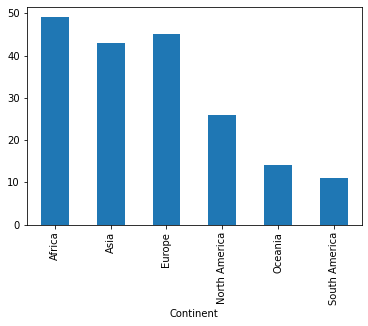

In [28]:
gdp_df.groupby("Continent")["Country"].nunique().plot(kind='bar')

20) Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [29]:
GDP_2014_by_Continent = gdp_df[gdp_df.Year.isin(['2014'])]

In [30]:
GDP_2014_by_Continent.head()

,Country,Year,GDP_Per_Capita,Continent
5,Afghanistan,2014,2102.385234,Asia
23,Albania,2014,11623.866680,Europe
53,Algeria,2014,11512.705410,Africa
83,Angola,2014,8239.828837,Africa
113,Antigua and Barbuda,2014,18104.241470,North America


In [31]:
type(GDP_2014_by_Continent)

pandas.core.frame.DataFrame

In [32]:
GDP_2014_by_Continent.groupby('Continent')['GDP_Per_Capita'].sum()

Continent
Africa           2.928373e+05
Asia             1.111780e+06
Europe           1.532948e+06
North America    6.189731e+05
Oceania          1.621359e+05
South America    1.707547e+05
Name: GDP_Per_Capita, dtype: float64

In [33]:
type(GDP_2014_by_Continent)

pandas.core.frame.DataFrame

GDP_2014_by_Continent_df = GDP_2014_by_Continent.to_frame ()

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x0000026DAA391D00>>

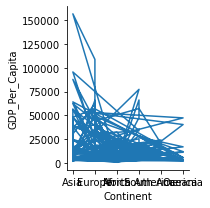

In [35]:
g = sns.FacetGrid(GDP_2014_by_Continent)
g.map(plt.plot, 'Continent', 'GDP_Per_Capita')
g.add_legend